# Assignment 6: Neural Networks using Keras and Tensorflow
##DAT405 Introduction to Data Science and AI
###By Pauline Nässlander and Albin Ekström

Hours spent on the assignment:

*   Pauline Nässlander: 12 hours
*   Albin Ekström: 12 hours




In [2]:
# imports
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt

In [3]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data() # numbers dataset

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

11501568/11490434 [==============================] - 0s 0us/step


**Preprocessing**

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)

### Question 1 
First in the Preprocessing highlighted section the train and test data is converted to the data type float32. This is because the data will at some point be converted to a 32 bit float, since this is the most common training precision in a neural network, hence we do it immediately instead. Secondly, this number is divided with 255. Since the gray scale pixel values are numbers between 0 and 255 (1 byte) this will result in a float between 0.0 and 1.0. This is not a required step but it helps with the learning rate and other hyper-parameters. Lastly, the target data is one-hot encoded and will be represented in vector form. E.g. representing number 3 with one-hot encoding will get [0 0 0 1 0 0 0 0 0 0]. 

In [ ]:
## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer = tf.keras.optimizers.SGD(lr = 0.1),
        metrics=['accuracy'],)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


## Question 2

### Question 2 a)
There are 4 layers in the NN model. The layers are: a flatten layer (784 neurons) followed by two dense layers (64 neurons each) and one last dense layer (10 neurons). The flatten layer does not have an activation function but the first two dense layers have the activation function *relu* and the last dense layer has the activation function *softmax*. The relu function allows for very efficient computations since it simply outputs the input if it is larger than 0.0 and 0 if it is less than 0. Since the gradient computation is so simple it allows for speeded training. The softmax function is good when predicting a multinomial probability distribution, which is used in this network. This model requires class membership on more than two classes.

The total number of parameters in the model is given by the sum of the parameters on each layer. Total is 55 050 parameters. The input layer has the same amount of neurons as there are pixels in the image, each neuron will be given a value between 0 and 1 from the preprocessing. Each image is of size 28x28 = 784 pixel, hence 784 inputs/neurons. The output layer has the same amount of neurons as there are possible classes. There are 10 numbers between 0 and 9 that can be classified. Each class will get a probability of how likely the image contains that specific number, hence there are 10 outputs /neurons.


### Question 2 b)
The loss-function used is *cross-entropy* and it’s functional form is
$$H(P,Q) = -\sum P(x)*log(Q(x))$$ where P is the observed probabilities (is either 1 or 0) and Q is the approximation of the target distribution aka the output of the softmax function. Since the cross-entropy is logarithmic the derivative for bad predictions will be quite large which will allow for larger step size for backpropagation. This is better than the square residuals method which will result in smaller steps and longer training time.

### Question 2 c)

In [ ]:
fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 2.3006 - accuracy: 0.1133 - val_loss: 2.3002 - val_accuracy: 0.1135
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 2.3000 - accuracy: 0.1144 - val_loss: 2.2991 - val_accuracy: 0.1135
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 2.2994 - accuracy: 0.1145 - val_loss: 2.2989 - val_accuracy: 0.1135
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 2.2986 - accuracy: 0.1154 - val_loss: 2.2982 - val_accuracy: 0.1512
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 2.2977 - accuracy: 0.1188 - val_loss: 2.2972 - val_accuracy: 0.1135
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 2.2962 - accuracy: 0.1190 - val_loss: 2.2952 - val_accuracy: 0.1135
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 2.2945 - accuracy: 0.1177 - val_loss: 2.2947 - val_accuracy: 0.1028
Epoch 

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 64)                50240     
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


### Question 2 d)

In [ ]:
## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dense(300, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer = tf.keras.optimizers.SGD(lr = 0.1),
        metrics=['accuracy'],)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
epochs = 40
fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/40
469/469 [==============================] - 7s 13ms/step - loss: 0.4028 - accuracy: 0.8874 - val_loss: 0.2128 - val_accuracy: 0.9400
Epoch 2/40
469/469 [==============================] - 6s 12ms/step - loss: 0.1892 - accuracy: 0.9451 - val_loss: 0.1638 - val_accuracy: 0.9528
Epoch 3/40
469/469 [==============================] - 6s 13ms/step - loss: 0.1378 - accuracy: 0.9599 - val_loss: 0.1285 - val_accuracy: 0.9615
Epoch 4/40
469/469 [==============================] - 6s 13ms/step - loss: 0.1090 - accuracy: 0.9687 - val_loss: 0.1084 - val_accuracy: 0.9684
Epoch 5/40
469/469 [==============================] - 6s 12ms/step - loss: 0.0880 - accuracy: 0.9743 - val_loss: 0.0968 - val_accuracy: 0.9697
Epoch 6/40
469/469 [==============================] - 6s 12ms/step - loss: 0.0746 - accuracy: 0.9784 - val_loss: 0.0852 - val_accuracy: 0.9737
Epoch 7/40
469/469 [==============================] - 6s 12ms/step - loss: 0.0626 - accuracy: 0.9821 - val_loss: 0.0850 - val_accuracy: 0.9720

In [ ]:
import statistics

r_factors = [1e-6, 1e-5, 0,5e-5, 1e-4, 1e-3] # 5 different regularization factors

In [ ]:
std_accuracy = []
mean_accuracy = []

for r_factor in r_factors:
  std_list = []

  for i in range(0,3):
    model = Sequential()

    model.add(Flatten())
    model.add(Dense(500, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(r_factor)))
    model.add(Dense(300, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(r_factor)))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer = tf.keras.optimizers.SGD(lr = 0.1),
            metrics=['accuracy'],)
    
    fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=0,
           validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    std_list.append(score[1]) # append accuracy

  std_accuracy.append(statistics.stdev(std_list))
  mean_accuracy.append(statistics.mean(std_list))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


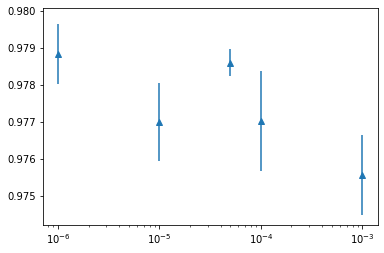

In [ ]:
plt.errorbar(r_factors, mean_accuracy, std_accuracy, linestyle='None', marker='^')
ax = plt.gca()
ax.set_xscale('log')
plt.show()

Mean accuracy + standard divation

In [ ]:
print(mean_accuracy[0] + std_accuracy[0])

0.9796354324492814


The closest result to Hintons result (0.9814 accuracy) is achieved when the regularization factor is 1e-6 which has mean accuracy plus standard deviation = 0.9796. This is a worse result than the model without regularization but it is important to keep in mind that these models are only trained for 10 epochs while the previous one was trained for 40 epochs.

## Question 3

In [95]:
model = Sequential()

model.add(Conv2D(32, kernel_size= (3,3), activation='relu', input_shape = (28,28,1)))
model.add(Conv2D(64, kernel_size= (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size= (3,3)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.SGD(lr = 0.1),
        metrics=['accuracy'],)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [96]:
fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=40,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/40
469/469 [==============================] - 4s 9ms/step - loss: 0.3951 - accuracy: 0.8767 - val_loss: 0.0949 - val_accuracy: 0.9703
Epoch 2/40
469/469 [==============================] - 4s 9ms/step - loss: 0.1089 - accuracy: 0.9666 - val_loss: 0.0568 - val_accuracy: 0.9821
Epoch 3/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0777 - accuracy: 0.9759 - val_loss: 0.0393 - val_accuracy: 0.9869
Epoch 4/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0619 - accuracy: 0.9807 - val_loss: 0.0358 - val_accuracy: 0.9883
Epoch 5/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0530 - accuracy: 0.9835 - val_loss: 0.0314 - val_accuracy: 0.9896
Epoch 6/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0454 - accuracy: 0.9857 - val_loss: 0.0319 - val_accuracy: 0.9901
Epoch 7/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0411 - accuracy: 0.9870 - val_loss: 0.0273 - val_accuracy: 0.9898
Epoch 

### Question 3 a)
Using two convolutional layers, one max pooling layer and onelayer of dropout will produce a model with accuracy 0.991. This solution was inspired by https://www.geeksforgeeks.org/applying-convolutional-neural-network-on-mnist-dataset/ . The max pooling layer takes the maximum value from a kernel in this case 3 by 3 pixels large and outputs this into a smaller image with the maximum values. This is good since it reduces the dimensionality. The dropout layer reduces the risk of overfitting the model by stochastically removing units with a probability of 0.5. The hidden neurons can not co-adapt to others which makes the model more general.

### Question 3 b)
In this application it is suitable to use convolutional layers because of their ability to represent an image internally (in the model). Since the MNIST dataset contains two dimensional images this becomes an useful ability.

## Question 4

In [5]:
import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c

#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)


In [6]:
latent_dim = 96  # Dimensions of compressed data

input_image = keras.Input(shape=(784,)) # Shape: [0. 0. ... 0. 1.], size 784
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded) # Autoencodern, encoder -> decoder
encoder_only = keras.Model(input_image, encoded) # Encodern

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:]) 
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

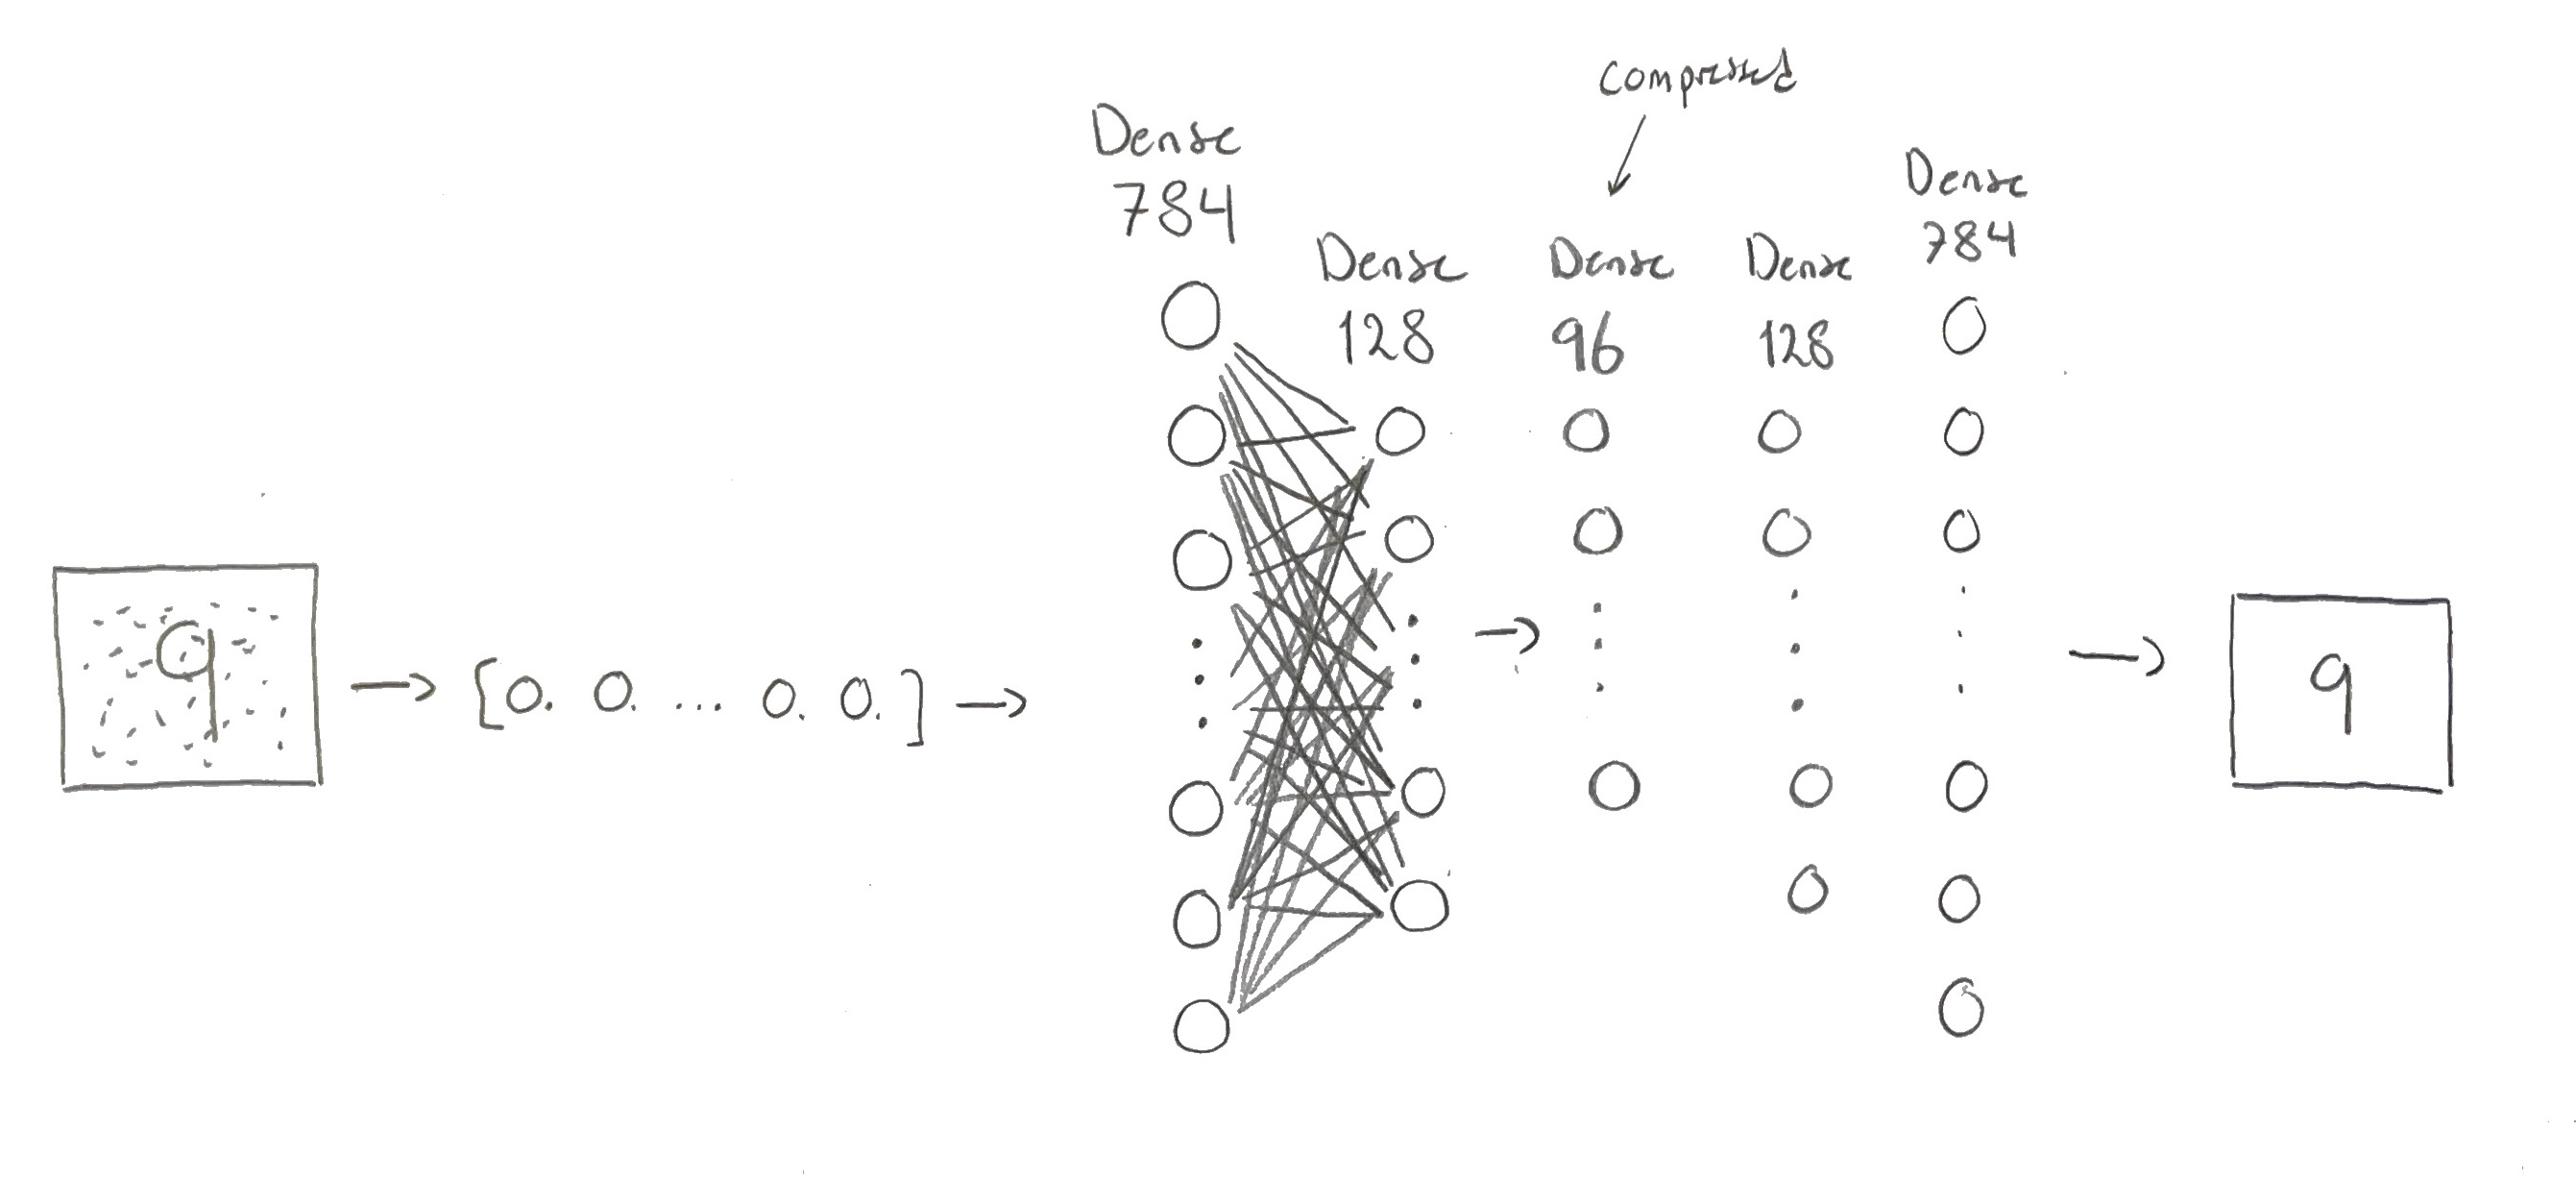

In [42]:
autoencoder.summary()

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_40 (Dense)            (None, 128)               100480    
                                                                 
 dense_41 (Dense)            (None, 96)                12384     
                                                                 
 dense_42 (Dense)            (None, 128)               12416     
                                                                 
 dense_43 (Dense)            (None, 784)               101136    
                                                                 
Total params: 226,416
Trainable params: 226,416
Non-trainable params: 0
_________________________________________________________________


In [7]:
fit_info_AE = autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                validation_data=(flattened_x_test_seasoneed, flattened_x_test))

Epoch 1/32
938/938 [==============================] - 9s 6ms/step - loss: 0.1925 - val_loss: 0.1538
Epoch 2/32
938/938 [==============================] - 4s 4ms/step - loss: 0.1476 - val_loss: 0.1410
Epoch 3/32
938/938 [==============================] - 4s 5ms/step - loss: 0.1376 - val_loss: 0.1336
Epoch 4/32
938/938 [==============================] - 4s 4ms/step - loss: 0.1324 - val_loss: 0.1310
Epoch 5/32
938/938 [==============================] - 4s 5ms/step - loss: 0.1290 - val_loss: 0.1281
Epoch 6/32
938/938 [==============================] - 4s 4ms/step - loss: 0.1267 - val_loss: 0.1272
Epoch 7/32
938/938 [==============================] - 4s 5ms/step - loss: 0.1249 - val_loss: 0.1253
Epoch 8/32
938/938 [==============================] - 5s 5ms/step - loss: 0.1237 - val_loss: 0.1245
Epoch 9/32
938/938 [==============================] - 7s 7ms/step - loss: 0.1227 - val_loss: 0.1234
Epoch 10/32
938/938 [==============================] - 4s 4ms/step - loss: 0.1219 - val_loss: 0.1232

### Question 4 a)
The denoising deep autoencoder model purposely adds noise to each image. Then it compresses this image and outputs a clean image without noise. Why would we do this? This is because it helps with overfitting, the hidden layers become more robust and it prevents the encoder from learning a simple identity function. 

The data preparation code transforms the representation of the train and test images from four dimensions to two dimensions by reshaping it so that each image is represented as one row in the new 2 dimensional matrix. The difference to the previous representation where each image was represented as a 2 dimensional array with one datapoint in each row.

In the model definition the goal is reached from taking in the original input size of the reshaped training data 784 data points. Then adding a hidden Dense layer and outputting the dimensions of the compressed image (96 data points). Then it adds a hidden Dense layer after the compression (which takes in 96 data points) and outputs this to a last Dense layer. This layer will output 784 data points with values between 0 and 1 (as the activation function of the last layer is sigmoid) to be classified as the denoised image.

The loss function used is called binary crossentropy which calculates the loss somewhat similar to the crossentropy loss function but is more suitable for binary decisions. It is very suitable for solving many classification problems at the same time as long as each classification can be described as a binary decision (in this case 0 or 1). In short the binary crossentropy loss function calculates how far away from the target value the prediction is for each class. As in the case of the autoencoder the target value is the unseasoned image and each class is one pixel, this loss function will describe how well the image was reconstructed.

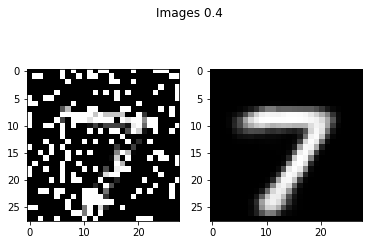

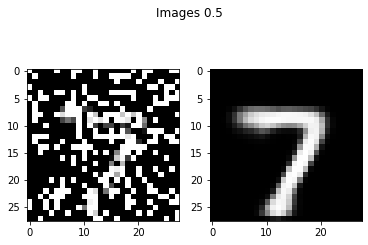

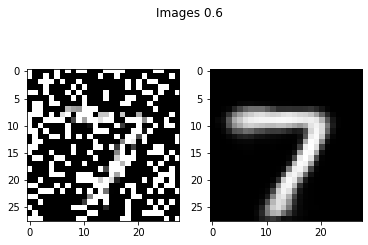

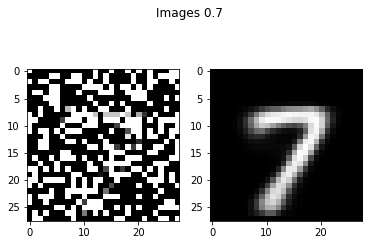

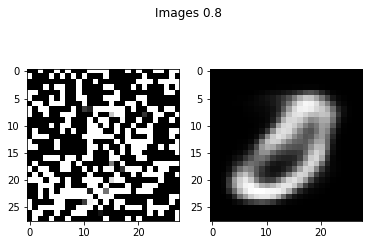

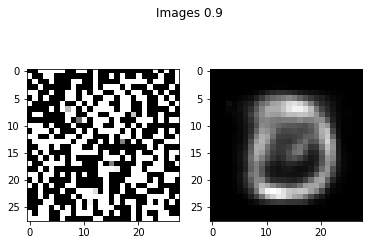

In [59]:
levels = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for noise_level in levels:
  flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level)
  flattened_x_test_seasoned = salt_and_pepper(flattened_x_test, noise_level) 

  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.suptitle('Images {0}'.format(noise_level))

  predict = autoencoder.predict(flattened_x_test_seasoned, verbose=0)
  predict = predict[0].reshape((28, 28))
  original = flattened_x_test_seasoned[0].reshape((28, 28))

  ax1.imshow(original, cmap= 'gray')
  ax2.imshow(predict, cmap= 'gray')

### Question 4 b)
At a noise level of 0.5 it becomes difficult to identify the digits by using the human eye and for noise level 0.8 the autoencoder stops working. 

In [84]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [97]:
noise_levels = np.linspace(0,1,21)
all_TPR = []

for noise_level in noise_levels:
  flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level)
  flattened_x_test_seasoned = salt_and_pepper(flattened_x_test, noise_level) 

  predict = autoencoder.predict(flattened_x_test_seasoned, verbose=0).reshape((-1, 28, 28))
  y_predict = model.predict(predict)

  matrix = confusion_matrix(y_test.argmax(axis=1), y_predict.argmax(axis=1))

  FN = matrix.sum(axis=1) - np.diag(matrix)
  TP = np.diag(matrix)

  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN)
  all_TPR.append(np.mean(TPR))

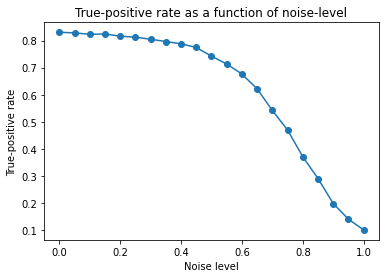

In [98]:
plt.plot(noise_levels, all_TPR, '-o')
plt.title("True-positive rate as a function of noise-level")
plt.xlabel("Noise level")
plt.ylabel("True-positive rate")
plt.show()

### Question 4 c)
As shown in the graph above the true positive rate decreases as the noise level increases for this combination of autoencoder and model. Note that for low values of noise (under 0.4) the TPR (True positive rate) does not decrease noticeably. Before compiling, some increment in performance was expected for noise levels larger than 0. However, this was not the case for this particular model as can be confirmed by looking at the graph above . This might be due to the fact that the best model created in assignment 3 already was robust and since it used a max pooling and dropout layer it did not have a problem with overfitting resulting in the autoencoder being redundant.

### Question 4 d)
Trying to first add random noice to image, but it seems to only output garbage. We didn't find any other solution to this problem. 

Maybe you could input an image of a number into the encoder and then stop it at the compression. Add random noise to that image and it will generate synthetic "hand-written" numbers.

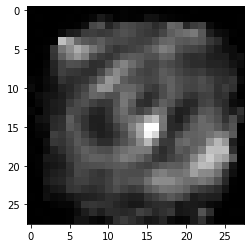

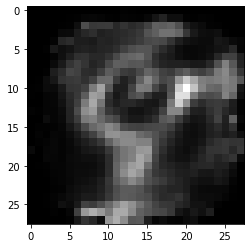

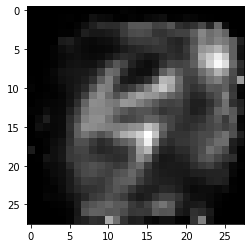

In [29]:
matrix = np.zeros((3,96))
test = salt_and_pepper(matrix, noise_level=1)

for i in range(0,3):
  predict = decoder.predict(test)
  predict = predict[i].reshape((28, 28))
  fig, ax = plt.subplots()
  ax.imshow(predict, cmap= 'gray')